# AN INTRODUCTORY EXAMPLE

In [78]:
# import macro-functions (libraries) to perform high level computation and funtions

import pandas as pd   # to manage table

import numpy as np    # to manage linear algebra

import matplotlib.pyplot as plt      # to plot data

import seaborn as sns                # to plot data
#sns.set_theme();

import statsmodels.api as sm         # to use statistical tools

from sklearn.preprocessing import scale   # tools to preprocess data

import warnings; warnings.filterwarnings('ignore') # "default" restore default mode "ignore" ignore

## **SCENARIO**: You are working with the marketing department of a car seller. Your boss gives you last sales data and asked you:
- To create a summary report on the total sales for Manufacturer
- To identify what factors influence the sales
- To make a prediction about how many sales can be generated with an investment of 500k euro in TV Advertising
- To make a prediction about how many sales can be generated with an investment of 75k euro in Social Advertising
- To make a prediction for some new cars models about a chance to win the prestigious award "Car of the Year". Factors of success are Power performance and Fuel Efficiency. Data about these factors for the new cars will be provided

All data are in excel files provided by IT department. 

First I load all the excel file directly in a table

In [3]:
# Load a CSV file on a local table (dataframe)
sales_table = pd.read_csv('./Data/sales_data.csv')

# Alternatively load the file from an url
#url = 'https://raw.githubusercontent.com/pal-dev-labs/Python-for-Economic-Applications/main/Data/sales_data.csv'
#sales_table = pd.read_csv(url)

In [4]:
# print the dataframe info

sales_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             157 non-null    int64  
 1   Manufacturer           157 non-null    object 
 2   Model                  157 non-null    object 
 3   Sales_in_thousands     157 non-null    float64
 4   Price_in_thousands     157 non-null    float64
 5   TV Advert (thousands)  157 non-null    float64
 6   Social Advert          157 non-null    int64  
 7   Engine_size            157 non-null    float64
 8   Horsepower             157 non-null    float64
 9   Wheelbase              157 non-null    float64
 10  Width                  157 non-null    float64
 11  Length                 157 non-null    float64
 12  Curb_weight            157 non-null    float64
 13  Fuel_capacity          157 non-null    float64
 14  Fuel_efficiency        157 non-null    float64
 15  Latest

In [5]:
# print the dataframe content

sales_table

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,TV Advert (thousands),Social Advert,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Awarded
0,0,Acura,Integra,16.919,21.50,142.516144,53481,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,0
1,1,Acura,TL,39.384,28.40,383.026416,39441,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,0
2,2,Acura,CL,14.114,0.00,165.928640,44114,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,0.000000,0
3,3,Acura,RL,8.588,42.00,63.259267,98103,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,0
4,4,Audi,A4,20.397,23.99,156.508762,38450,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,Volvo,V40,3.545,24.40,70.518707,28535,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,0
153,153,Volvo,S70,15.245,27.50,171.875269,117895,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,0
154,154,Volvo,V70,17.531,28.80,172.154270,102228,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,0
155,155,Volvo,C70,3.493,45.50,29.538936,100522,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,0


# DATA EXPLORATION

I want to know how many different models each Manifacturer has

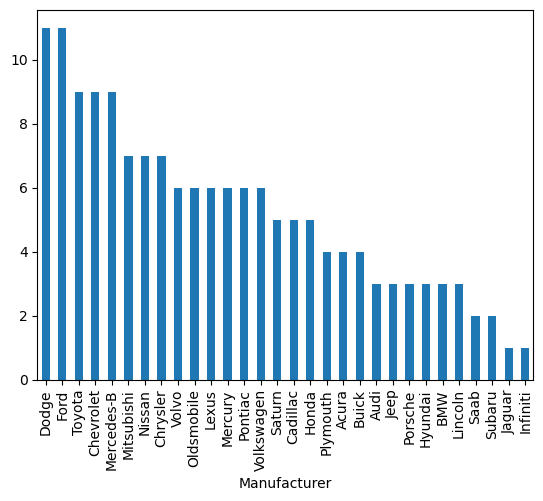

In [6]:
# for each manufacturer group the models and plot a barplot
sales_table['Manufacturer'].value_counts().plot.bar();

I want to save this image for my future report. I need a nicer figure

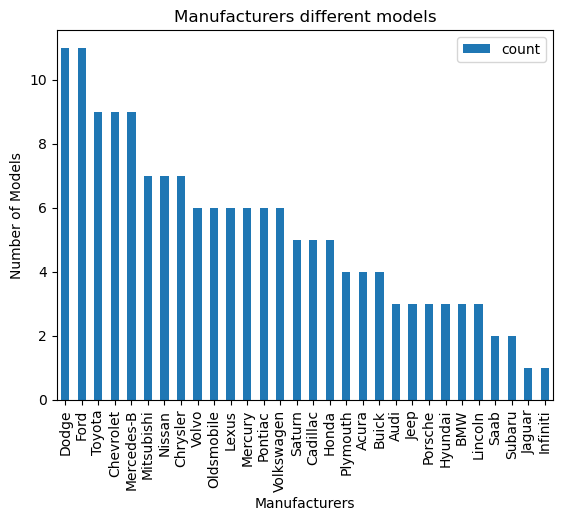

In [7]:
sales_table['Manufacturer'].value_counts().plot.bar()

# add some decorators
plt.xlabel('Manufacturers')
plt.ylabel('Number of Models')
plt.title('Manufacturers different models')
plt.legend()
plt.savefig('manufacturer.png')  # this saves the figure i

# TABLE MANIPULATION

I want to extract total amount of sales for each manufacturer

In [8]:
total_sales = pd.pivot_table(sales_table, index=['Manufacturer'], values=['Sales_in_thousands'],aggfunc=[np.sum])
total_sales

,sum
,Sales_in_thousands
Manufacturer,
Acura,79.005
Audi,40.557
BMW,46.505
Buick,242.019
Cadillac,112.178
Chevrolet,554.365
Chrysler,201.721
Dodge,910.149


Let's order a little bit

In [9]:
total_sales = total_sales.sort_values(by=('sum', 'Sales_in_thousands'), ascending=False)
total_sales

,sum
,Sales_in_thousands
Manufacturer,
Ford,2022.635
Dodge,910.149
Toyota,740.205
Honda,592.674
Chevrolet,554.365
Nissan,399.635
Pontiac,370.534
Jeep,293.153


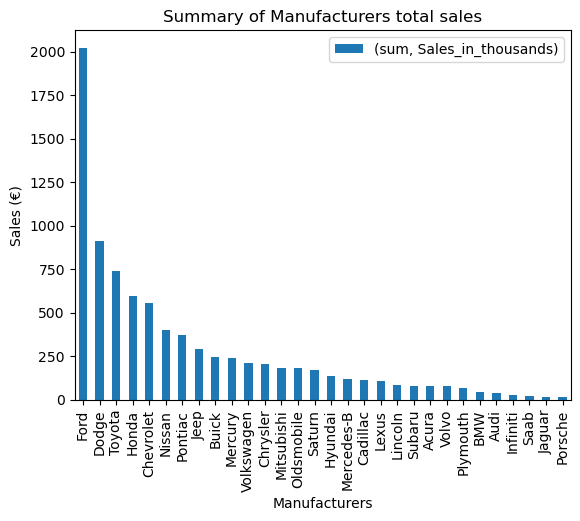

In [10]:
total_sales.plot.bar(legend = False)
plt.ylabel('Sales (€)');
plt.xlabel('Manufacturers')
plt.title('Summary of Manufacturers total sales')
plt.legend()
plt.savefig('manufacturer_total_sales.png')  # this saves the figure i

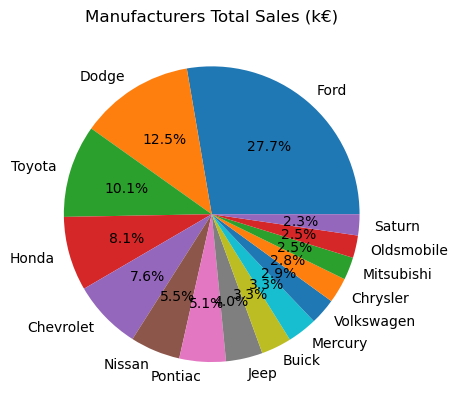

In [11]:
total_sales.iloc[0:15].plot.pie(subplots=True, legend= False, autopct="%1.1f%%")
plt.ylabel('');
plt.xlabel('')
plt.title('Manufacturers Total Sales (k€)')
plt.savefig('manufacturer_total_sales2.png') 

## I would like to understand if there are factors that influence the sales

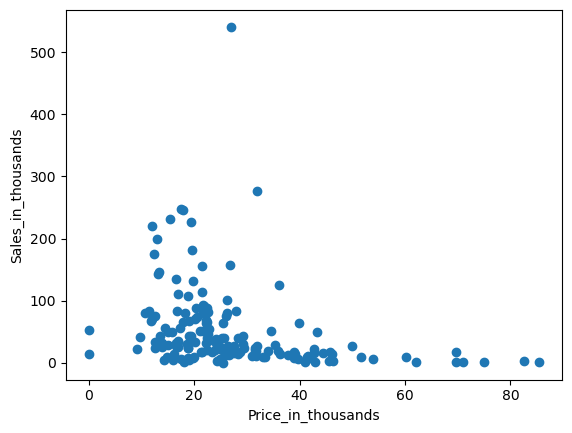

In [12]:
plt.scatter(sales_table['Price_in_thousands'].values, sales_table['Sales_in_thousands'].values)
plt.xlabel("Price_in_thousands");plt.ylabel("Sales_in_thousands");

## Let's try with more features

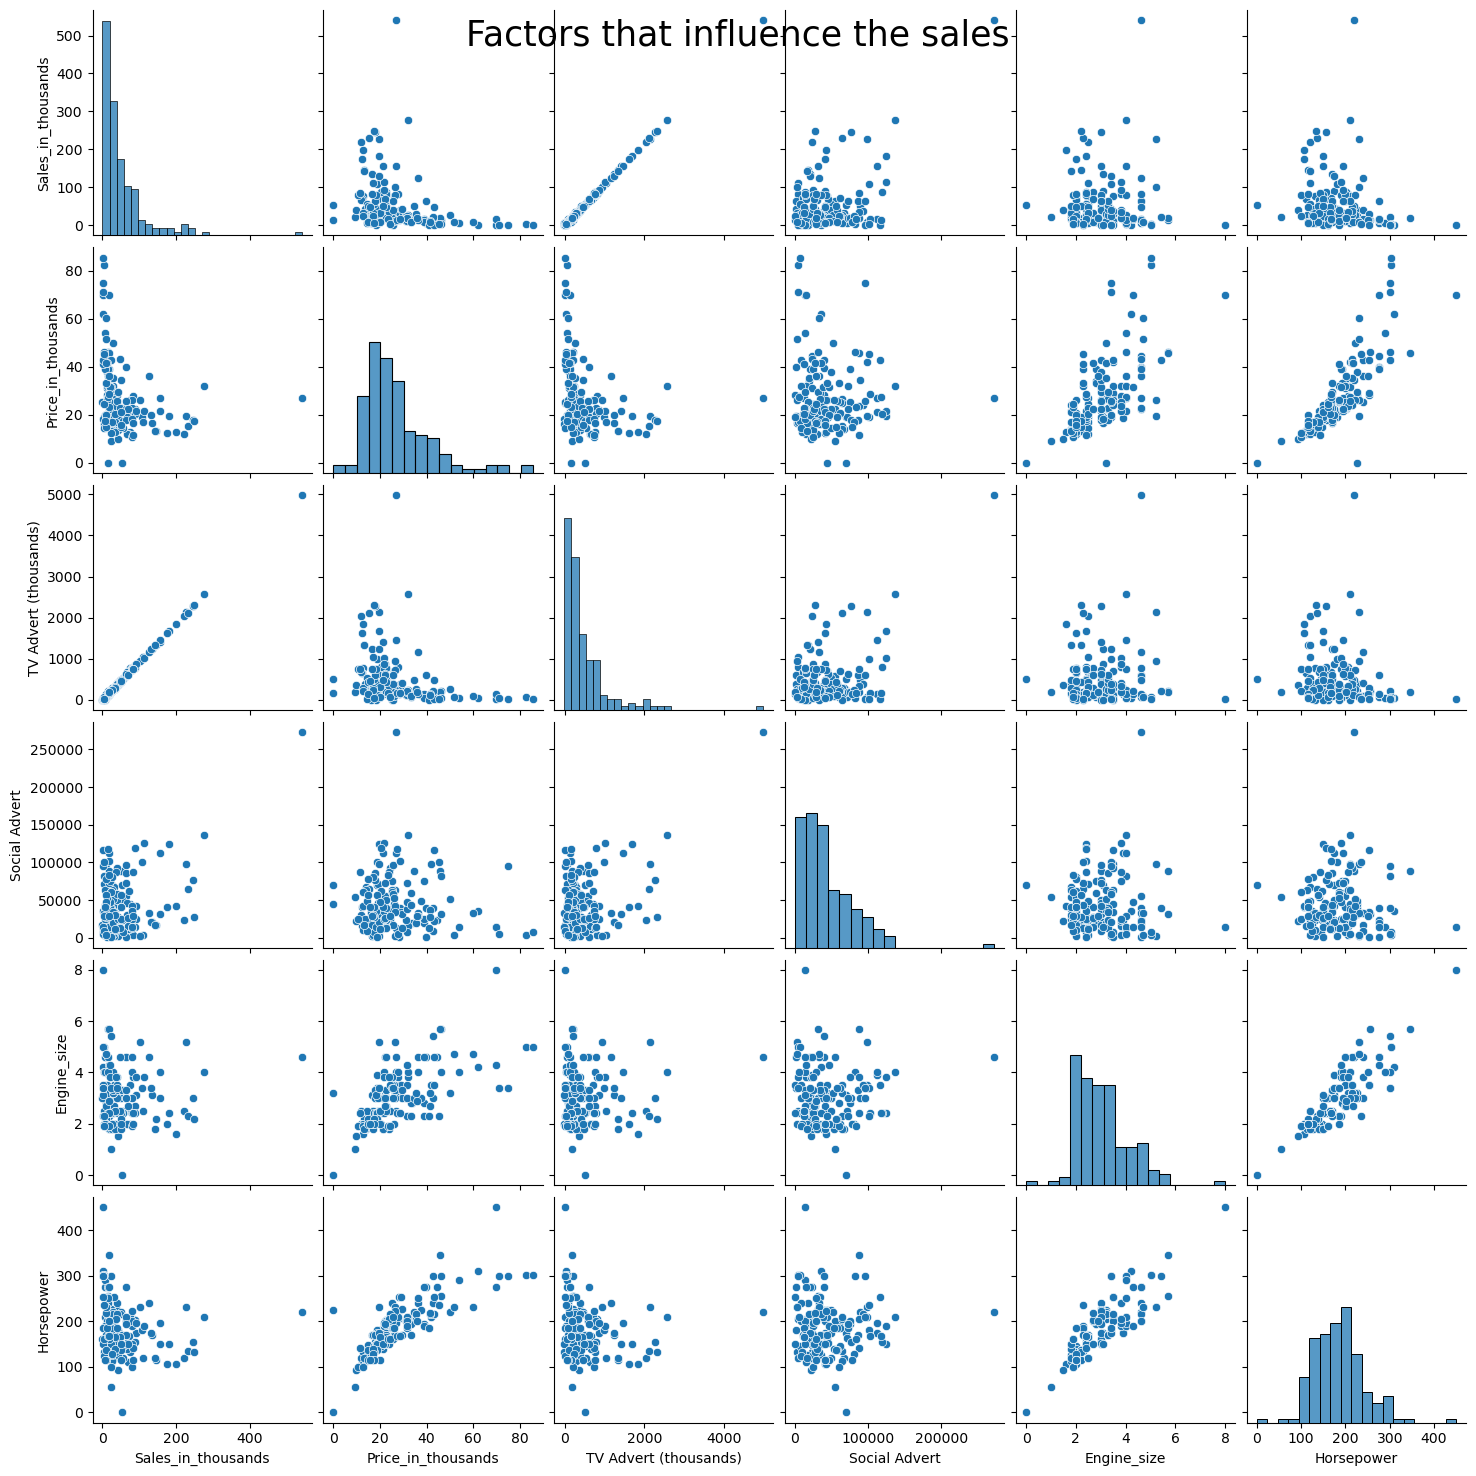

In [13]:
g = sns.pairplot(sales_table.iloc[:,[3,4,5,6,7,8]]);
g.fig.suptitle("Factors that could influence the sales", fontsize=25)
plt.show()

## Price, TV Advertising (very correlated) and Social Advertising seems interesting

## Let's try to calculate a correlation 

In [14]:
cor_tv = sales_table['Sales_in_thousands'].corr(sales_table['TV Advert (thousands)'])
cor_social = sales_table['Sales_in_thousands'].corr(sales_table['Social Advert'])
cor_price = sales_table['Sales_in_thousands'].corr(sales_table['Price_in_thousands'])
print("Correlation between Sales and TV Advertising:", cor_tv)
print("Correlation between Sales and Social Advertising:", cor_social)
print("Correlation between Sales and Price:", cor_price)

Correlation between Sales and TV Advertising: 0.9993329337138769
Correlation between Sales and Social Advertising: 0.40834603089512705
Correlation between Sales and Price: -0.2907502878534738


## TV Advertising seems to be very linearly correlated with Sales.

## Could be interesting to perform a linear regression to have a predictor for sales

In [15]:
# extract X training data from dataframe
X_train = sales_table['TV Advert (thousands)'].values
X_train = sm.add_constant(X_train)

# extract y training data from dataframe
y_train = sales_table['Sales_in_thousands'].values


In [16]:
# set simple linear regression model
model = sm.OLS(y_train,X_train)    # create the OLS model

# train the model
results= model.fit()   # train the model

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.161e+05
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          9.96e-225
Time:                        20:14:21   Log-Likelihood:                -365.15
No. Observations:                 157   AIC:                             734.3
Df Residuals:                     155   BIC:                             740.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0415      0.253     -0.164      0.8

In [17]:
print("Coefficients: ", results.params)
print("R2: ", results.rsquared)

Coefficients:  [-0.04148823  0.1079617 ]
R2:  0.9986663124051847


## Let's try to visualize the regression line 

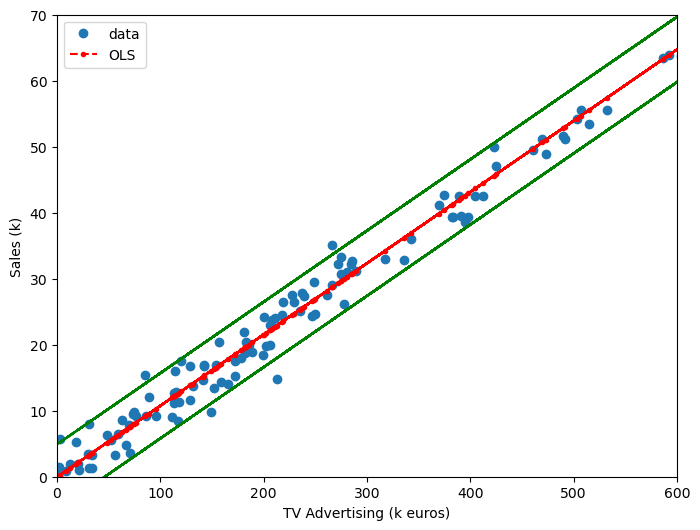

In [18]:
# ------------------------------------
# calculate predictions
pred_ols = results.get_prediction()

#-------------------------------------
# Confidence intervals
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

#--------------------------------------
# plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X_train[:,1], y_train, "o", label="data")   # plot original data
ax.plot(X_train[:,1], results.fittedvalues, "r--.", label="OLS")  # plot fitted data
ax.plot(X_train[:,1], iv_u, "r--", c='g')   # plot upper confident interval
ax.plot(X_train[:,1], iv_l, "r--", c='g')   # plot lower confident interval

#---------------------------------------
# figure decorator
ax.legend(loc="best")
plt.xlim(0,600)
plt.ylim(0,70)
plt.xlabel('TV Advertising (k euros)')
plt.ylabel('Sales (k)')
plt.show()

## Having a statistical model for TV Advertising I can estimate how many sales can be generated with an investment of 500k euro in TV Advertising

In [79]:
inv = 500
β1 = results.params[0]  # estimated parameter
β2 = results.params[1]  # estimated parameter
y_pred = β1 + β2 * inv
print("Estimated amount of sales with investment of",inv,"k euros is",y_pred, "k units")

AttributeError: 'KNeighborsRegressor' object has no attribute 'params'

# Let's make the prediction for the TV Advertising

In [20]:
X_train_social = sales_table['Social Advert'].values

In [21]:
# train the model

model1 = sm.OLS(y_train,X_train_social)    # create the OLS model
results1 = model1.fit()   # train the model

# Print the model summary
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.462
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              134.1
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                    8.91e-23
Time:                        20:14:37   Log-Likelihood:                         -873.52
No. Observations:                 157   AIC:                                      1749.
Df Residuals:                     156   BIC:                                      1752.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## We got poor results. Let's try with a non linear estimator: KNeighborsRegressor (https://it.wikipedia.org/wiki/K-nearest_neighbors)

In [22]:
# import the libraries
from sklearn import neighbors   # to import the model

# extract data from original sales dataframe
X_social = sales_table['Social Advert'].values
y = sales_table['Sales_in_thousands'].values

# preprocess inputs for the model
from sklearn.preprocessing import scale   # to preprocess the input
X_social_prep = scale(X_social, with_mean=False, with_std=False).reshape(-1,1)

# split train test and test test to check accuracy of the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_social_prep, y, test_size=0.25)

# set model hyperparameters
n_neighbors = 20

# set the model
knn = neighbors.KNeighborsRegressor(n_neighbors)

# fit the model
results = knn.fit(X_train, y_train)

In [23]:
# Calculate the mean squared error (MSE)
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

# Calculate the test MSE
y_hat_train = results.predict(X_train)
mse_value_train = mse(y_train, y_hat_train)

# Calculate the test MSE
y_hat_test = results.predict(X_test)
mse_value_test = mse(y_test, y_hat_test)

# Print the MSE
print("MSE train:",mse_value_train)
print("MSE test:",mse_value_test)

MSE train: 4314.649559233183
MSE test: 4297.2173646115625


# Note that the MSE change each time we run the model

## Let's have a look of the predition

272270

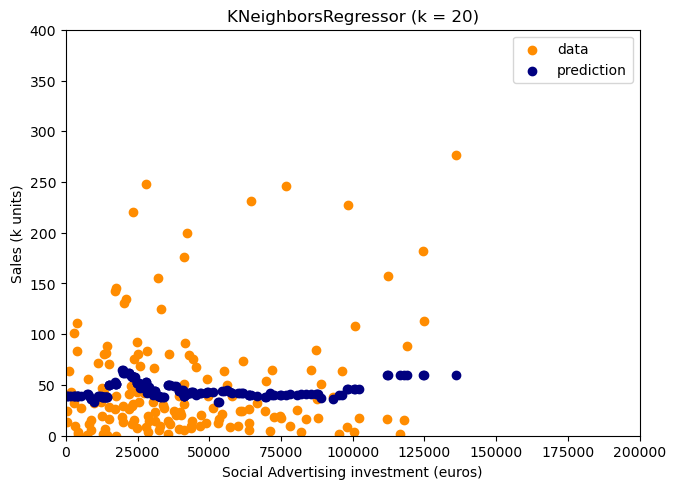

In [26]:
y_hat = results.predict(X_social_prep)

plt.scatter(X_social_prep, y, color='darkorange', label='data')
plt.scatter(X_social_prep, y_hat, color='navy', label='prediction')
plt.legend()
plt.title("KNeighborsRegressor (k = %i)" % (n_neighbors))

plt.tight_layout()
plt.xlim(0,200000)
plt.ylim(0,400)
plt.xlabel("Social Advertising investment (euros)")
plt.ylabel("Sales (k units)")

plt.show()

## Do we have the best model? We can change the hyperparameters **n_neighbors** and check MSE

In [29]:
# split train test and test test to check accuracy of the model
X_train, X_test, y_train, y_test = train_test_split(X_social_prep, y, test_size=0.25)

# we will use the SAME set to train the model with different hyperparameters
mse_value_train = []
mse_value_test = []

for i in range(1,100):
    n_neighbors = i
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    results = knn.fit(X_train, y_train)
    # Calculate the test MSE
    y_hat_train = results.predict(X_train)
    mse_value_train.append(mse(y_train, y_hat_train))
    # Calculate the test MSE
    y_hat_test = results.predict(X_test)
    mse_value_test.append(mse(y_test, y_hat_test))

Text(0, 0.5, 'MSE')

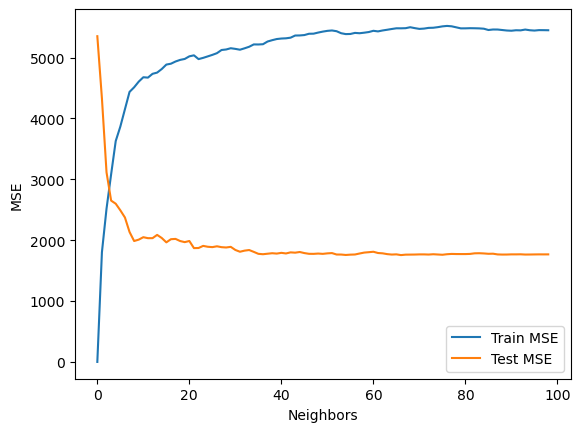

In [30]:
plt.plot(mse_value_train, label='Train MSE')
plt.plot(mse_value_test, label='Test MSE')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('MSE')

## we can take neighbors = 50 as best hyperparameter and make a prediction for the investment of 75k euro in Social Advertising


In [31]:
## we can take neighbors = 50 as best hyperparameter and prediction about and make a prediction for the investment of 75k euro in Social Advertising
n_neighbors = 50

knn = neighbors.KNeighborsRegressor(n_neighbors)
results = knn.fit(X_train, y_train)
y_hat = results.predict(np.array([75000]).reshape(-1,1))

print('An investment of 75k euro in Social Advertising generates ',y_hat[0], 'units of sale')

An investment of 75k euro in Social Advertising generates  49.17094 units of sale


# Last question: The award

## We have to make a prediction for three new cars models about a chance to win the prestigious award "Car of the Year".

## Factors of success are Power performance and Fuel Efficiency. 

In [32]:
sales_table[['Manufacturer','Model','Fuel_efficiency','Power_perf_factor','Awarded']]

,Manufacturer,Model,Fuel_efficiency,Power_perf_factor,Awarded
0,Acura,Integra,28.0,58.280150,0
1,Acura,TL,25.0,91.370778,0
2,Acura,CL,26.0,0.000000,0
3,Acura,RL,22.0,91.389779,0
4,Audi,A4,27.0,62.777639,0
...,...,...,...,...,...
152,Volvo,V40,25.0,66.498812,0
153,Volvo,S70,25.0,70.654495,0
154,Volvo,V70,25.0,71.155978,0
155,Volvo,C70,23.0,101.623357,0


## We note that the column "Awarded" has 0 for NOT win and 1 for WIN.

## We have to build a standard classifier with 2 predictors: "Fuel_efficiency" and "Power_perf_factor"

## Let's load the file provided by IT

In [33]:
# Load the CSV file provided by IT on a local table (dataframe)
award_factors = pd.read_csv('./Data/award-factors.csv')

# Alternatively load the file from an url
#url = 'https://raw.githubusercontent.com/pal-dev-labs/Python-for-Economic-Applications/main/Data/award-factors.csv'
#award_factors = pd.read_csv(url)

In [34]:
award_factors

,Manufacturer,Model,Fuel_efficiency,Power_perf_factor
0,Acura,X1,22,48.280150
1,Audi,X1,20,74.565105
2,Audi,X2,21,110.320000
3,BMW,323i 2,26,71.191207
4,Chevrolet,Lumina2,25,169.991396
5,Chevrolet,Monte Carlo 2,25,72.030917
6,Chevrolet,Camaro,25,81.118543
7,Chevrolet,Corvette 2,20,121.141150
8,Chevrolet,Prizm,33,48.297636
9,Chevrolet,Metro,45,23.276272


## We will use a Neural Network as a classifier. We will use 2 preditors 'Fuel_efficiency' and 'Power_perf_factor'

In [35]:
# Split the data into features and target
X = sales_table[['Fuel_efficiency', 'Power_perf_factor']]
y = sales_table['Awarded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [36]:
from tensorflow import keras

# Define the model
model = keras.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(2,)),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=100);

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 15.3365 - accuracy: 0.0684
Epoch 2/100
4/4 [==============================] - 0s 907us/step - loss: 11.4580 - accuracy: 0.0769
Epoch 3/100
4/4 [==============================] - 0s 829us/step - loss: 7.6291 - accuracy: 0.0855
Epoch 4/100
4/4 [==============================] - 0s 825us/step - loss: 3.8873 - accuracy: 0.0855
Epoch 5/100
4/4 [==============================] - 0s 852us/step - loss: 0.9328 - accuracy: 0.5128
Epoch 6/100
4/4 [==============================] - 0s 793us/step - loss: 0.2356 - accuracy: 0.9402
Epoch 7/100
4/4 [==============================] - 0s 812us/step - loss: 0.4394 - accuracy: 0.9402
Epoch 8/100
4/4 [==============================] - 0s 870us/step - loss: 0.5679 - accuracy: 0.9402
Epoch 9/100
4/4 [==============================] - 0s 852us/step - loss: 0.6607 - accuracy: 0.9402
Epoch 10/100
4/4 [==============================] - 0s 807us/step - loss: 0.6874 - accuracy: 0.9402
Epoch 11/

In [39]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the loss and accuracy
print('Loss:', loss)
print('Accuracy:', accuracy)

2/2 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9000
Loss: 0.15171368420124054
Accuracy: 0.8999999761581421


## Make predictions on new cars


In [40]:
# Make predictions on new data

predictions = model.predict(award_factors[['Fuel_efficiency', 'Power_perf_factor']])
award_factors['Probability to Win (%)']=np.around(predictions*100,2)

award_factors

1/1 [==============================] - 0s 36ms/step


,Manufacturer,Model,Fuel_efficiency,Power_perf_factor,Probability to Win (%)
0,Acura,X1,22,48.280150,0.220000
1,Audi,X1,20,74.565105,2.780000
2,Audi,X2,21,110.320000,16.129999
3,BMW,323i 2,26,71.191207,0.200000
4,Chevrolet,Lumina2,25,169.991396,60.650002
5,Chevrolet,Monte Carlo 2,25,72.030917,0.330000
6,Chevrolet,Camaro,25,81.118543,0.600000
7,Chevrolet,Corvette 2,20,121.141150,36.439999
8,Chevrolet,Prizm,33,48.297636,0.000000
9,Chevrolet,Metro,45,23.276272,0.000000


# PYTHON PROGRAMMING LANGUAGE

## Everything Is an Object
Python is an **object-oriented programming language (OOPP)** and in Python everything is an **OBJECT**.

In an object-oriented programming languages like Python, an object is an entity that contains data along with associated metadata and/or functionality. 

In Python **everything is an object**, which means every entity has some metadata (called **attributes** or **fields**) and associated functionality (called **methods**). These attributes and methods are accessed via the dot syntax.

Example of objects are the integers numbers **1,2,3** or the symbols **"a"**,**"B"**,**"?"**. A "bigger" object could be a container of numbers **[1,2,3,4...,9,..,101]**

As objects are so fundamental, Python has already some built-in objects, like numbers and characters

Let's create an object **a**

In [42]:
"a"

'a'

We use the characters "" to create the object **'a'** whose data is the symbol *a*

Let's create an object that is a number

In [41]:
3

3

the object **3** contains the symbol 3 (that python considers as the mathematical value 3

Consider now

In [43]:
"3"

'3'

The object **'3'** is different from the object **3**. The last is the character *3* the first is the mathematical value 3

Different objects behave differently when we apply operations

In [18]:
3+3

6

In [22]:
"3"+"3"

'33'

Objects contain not only data or information but also **fields** and **methods**. We can use **dot** notation to access fields and methods

For example **capitalize** is a method to capitalize a symbol contained in a character object. It **produces** a new object that is the capitalized character


In [44]:
# capitalize is a method to capitalize the symbol a contained in the object 'a'. It produces the new object 'A'
"a".capitalize()

'A'

In [45]:
"A".lower()

'a'

The following picture summarize the objects creation process. We can note that every objects has a **TYPE** (or we can say it belongs to a **CLASS**)

<img src="images/objects1.png">


# Types
Objects have type information attached. 

There are built-in simple types offered by Python and several compound types, which will be discussed in the following lessons.

Python's simple types are summarized in the following table:

<center>**Python Scalar Types**</center>

| Type        | Example        | Description                                                  |
|-------------|----------------|--------------------------------------------------------------|
| ``int``     | ``1``      | integers (i.e., whole numbers)                               |
| ``float``   | ``1.0``    | floating-point numbers (i.e., real numbers)                  |
| ``complex`` | ``1 + 2j`` | Complex numbers (i.e., numbers with real and imaginary part) |
| ``bool``    | ``True``   | Boolean: True/False values                                   |
| ``str``     | ``'Ab$'``  | String: characters or text                                   |
| ``NoneType``| ``None``   | Special object indicating nulls                              |

We'll take a quick look at each of these in turn.

In [52]:
type(3)

int

In [53]:
type("Ab$")

str

In [5]:
type(1.5)

float

In [47]:
type(3+3)

int

In [48]:
type("abc"+"cde")

str

## Python Variables
Let's see how python manages variables.

We're going to assign the int value *10* to a variable named *a*, the str value "Stefano" to a variable named *name1* and a float *12.8* value to a variable named *c*

In [55]:
# assignment instructions

x = 4     # assign 10 to variable x
name1 = "Stefano"   #   # assign 10 to variable a 
c = 12.8 # assign 10 to variable a 


## Python Variables Are Pointers

Assigning variables in Python is as easy as putting a variable name to the left of the equals (``=``) sign:

```python
# assign 4 to the variable x
x = 4
```

It seems as we create a space in memory, named x, and insert directly the value 4 in that space.

This is NOT the way in which Python works.

In Python variables are best thought of not as containers but as **POINTERS**.
So in Python, when you write

```python
x = 4
```

you are essentially defining a *pointer* named ``x`` that points to an object in memory that contains the value ``4``. The right part of the assignment instruction above, creates an int object in memory and assignes the address memory of that object to the pointer ``x``. 


In this way, variable a is able to accesso all the information of the object, including value, fields and methods.


<img src="images/fig-variable-object-3.png">


In [58]:
type(x)

int

This works also for more complex objects


In [64]:
L = [1,2,3,4,5,6,7,8]        # create a container (a list) that contains the number 1,2,3..8 and assign the address of the object to the pointer L
print('We create the variable (pointer) L that points to the object',L,'which is of kind ',type(L))

We create the variable (pointer) L that points to the object [1, 2, 3, 4, 5, 6, 7, 8] which is of kind  <class 'list'>


The above instruction is an ASSIGNMENT instruction.

In the left side of the = we create in memory the object of kind list (a container) that contains the value 1,2,3,4,5,6,7,8

In the righe side of the = we create a pointer L that CONTAINS ONLY THE MEMORY ADDRESS of the object 


<img src="images/fig-variable-object-6.png">


When we create an object, we create not only values but also some functions (methods) associated with objects. 

With the pointers we can access these functions with the **dot** notation

In [66]:
a = "this is a Python course"
print(a)    # print the value of the object

this is a Python course


In [69]:
type(a)

str

an object of kind STR has many methods and we can call them with the notation a. 

For example

In [68]:
a.capitalize()

'This is a python course'

In [328]:
a.split()

['this', 'is', 'a', 'Python', 'course']

We can see all methods associate with an object with a.[TAB]

Consider now

In [70]:
y = [1, 2, 3]   # this create a container with 3 numbers
x = y

We've created two variables ``x`` and ``y`` which both point to the same object.
Because of this, if we modify the list via one of its names, we'll see that the "other" list will be modified as well:

In [71]:
print(y)

[1, 2, 3]


In [72]:
print(x)

[1, 2, 3]


In [73]:
x.append(4) # append 4 to the list pointed to by x
print(y) # y's list is modified as well!

[1, 2, 3, 4]


This behavior might seem confusing if you're wrongly thinking of variables as buckets that contain data.
But if you're correctly thinking of variables as pointers to objects, then this behavior makes sense.

Note also that if we use "``=``" to assign another value to ``x``, this will not affect the value of ``y`` – assignment is simply a change of what object the variable points to:

In [74]:
x = 'something else'
print(y)  # y is unchanged

[1, 2, 3, 4]


Again, this makes perfect sense if you think of x and y as pointers, and the "=" operator as an operation that changes what the name points to.

You might wonder whether this pointer idea makes arithmetic operations in Python difficult to track, but Python is set up so that this is not an issue. Numbers, strings, and other simple types are IMMUTABLE: you can't change their value – you can only change what values the variables point to. So, for example, it's perfectly safe to do operations like the following:

In [76]:
x = 10 
y = x
x = x+5  # we're creating a new object that contains the value 15
print("x =", x)
print("y =", y)

x = 15
y = 10


When we call ``x = x+5``, we are not modifying the value of the ``10`` object pointed to by ``x``; we are rather changing the variable ``x`` so that it points to a new integer object with value ``15``.
For this reason, the value of ``y`` is not affected by the operation.

## Arithmetic Operations
Python implements seven basic binary arithmetic operators, two of which can double as unary operators.
They are summarized in the following table:

| Operator     | Name           | Description                                            |
|--------------|----------------|--------------------------------------------------------|
| ``a + b``    | Addition       | Sum of ``a`` and ``b``                                 |
| ``a - b``    | Subtraction    | Difference of ``a`` and ``b``                          |
| ``a * b``    | Multiplication | Product of ``a`` and ``b``                             |
| ``a / b``    | True division  | Quotient of ``a`` and ``b``                            |
| ``a // b``   | Floor division | Quotient of ``a`` and ``b``, removing fractional parts |
| ``a % b``    | Modulus        | Integer remainder after division of ``a`` by ``b``     |
| ``a ** b``   | Exponentiation | ``a`` raised to the power of ``b``                     |
| ``-a``       | Negation       | The negative of ``a``                                  |
| ``+a``       | Unary plus     | ``a`` unchanged (rarely used)                          |

These operators can be used and combined in intuitive ways, using standard parentheses to group operations.
For example:

In [36]:
# addition, subtraction, multiplication
(4 + 8) * (6.5 - 3)

42.0

## Comparison Operations

Another type of operation which can be very useful is comparison of different values.
For this, Python implements standard comparison operators, which return Boolean values ``True`` and ``False``.
The comparison operations are listed in the following table:

| ``a == b``| ``a`` equal to ``b``      
| ``a != b`` | ``a`` not equal to ``b``             
| ``a < b``| ``a`` less than ``b``         
| ``a > b``| ``a`` greater than ``b``             
| ``a <= b``| ``a`` less than or equal to ``b``
|``a >= b`` | ``a`` greater than or equal to ``b``



These comparison operators can be combined with the arithmetic and bitwise operators to express a virtually limitless range of tests for the numbers.
For example, we can check if a number is odd by checking that the modulus with 2 returns 1:

In [37]:
2 < 1

False

In [38]:
# 25 is odd
25 % 2 == 1

True

In [39]:
# check if a is between 15 and 30
a = 25
15 < a < 30

True

## Boolean Operations
When working with Boolean values, Python provides operators to combine the values using the standard concepts of "and", "or", and "not".
Predictably, these operators are expressed using the words ``and``, ``or``, and ``not``:

In [15]:
x = 4
(x < 6) and (x > 2)

True

In [16]:
(x > 10) or (x % 2 == 0)

True

In [17]:
not (x < 6)

False

Boolean algebra aficionados might notice that the XOR operator is not included; this can of course be constructed in several ways from a compound statement of the other operators.
Otherwise, a clever trick you can use for XOR of Boolean values is the following:

In [18]:
# (x > 1) xor (x < 10)
(x > 1) != (x < 10)

False

These sorts of Boolean operations will become extremely useful when we begin discussing *control flow statements* such as conditionals and loops.

One sometimes confusing thing about the language is when to use Boolean operators (``and``, ``or``, ``not``), and when to use bitwise operations (``&``, ``|``, ``~``).
The answer lies in their names: Boolean operators should be used when you want to compute *Boolean values (i.e., truth or falsehood) of entire statements*.
Bitwise operations should be used when you want to *operate on individual bits or components of the objects in question*.

# EXERCISE

Try to execute all the cells of the notebook